# Test Script

In [1]:
# Imports

import  numpy as np
from scipy.io import loadmat

from kamitani_data_handler import *

handler = kamitani_data_handler(
    matlab_file='kamitani_data/fmri/Subject3.mat', 
    test_img_csv='kamitani_data/images/image_test_id.csv', 
    train_img_csv='kamitani_data/images/image_training_id.csv',
    log=0 # whether or not to take log of data, 1 before scaling, and 2 after scaling, 0 not at all
    )

handler.get_meta_keys()
handler.print_meta_desc()
print('\n')

train_fmri, test_fmri, test_fmri_avg = handler.get_data(roi='ROI_VC', normalize=0, imag_data=0, test_run_list=None)

print('train_fmri: ', train_fmri.shape)
print('test_fmri: ', test_fmri.shape)
print('test_fmri_avg: ', test_fmri_avg.shape)

['DataType', 'Run', 'Label', 'VoxelData', 'voxel_x', 'voxel_y', 'voxel_z', 'VolInds', 'ROI_V1', 'ROI_V2', 'ROI_V3', 'ROI_V4', 'ROI_LOC', 'ROI_FFA', 'ROI_PPA', 'ROI_LVC', 'ROI_HVC', 'ROI_VC']
['1 = Data type (1 = Training data; 2 = Perception test data; 3 = Imagery test data', '1 = Run number', '1 = Label (image ID)', '1 = Voxel data', 'Voxel x coordinate', 'Voxel y coordinate', 'Voxel z coordinate', '1 = Volume index', '1 = ROI V1', '1 = ROI V2', '1 = ROI V3', '1 = ROI V4', '1 = ROI LOC', '1 = ROI FFA', '1 = ROI PPA', '1 = ROI LVC', '1 = ROI HVC', '1 = ROI VC']


train_fmri:  (1200, 4643)
test_fmri:  (1750, 4643)
test_fmri_avg:  (50, 4643)


NUM_VOXELS:  4643


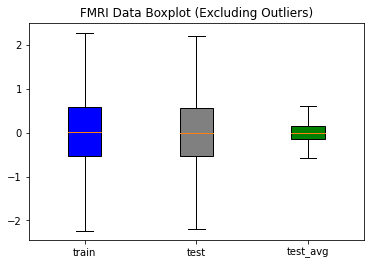

In [2]:
import matplotlib.pyplot as plt

# Check out data
NUM_VOXELS = train_fmri.shape[1]
print('NUM_VOXELS: ', NUM_VOXELS)

plt.figure(1)
bp = plt.boxplot(
    [train_fmri.flatten(), test_fmri.flatten(), test_fmri_avg.flatten()],
    patch_artist=True, 
    notch=False, 
    showfliers=False
)
colors = ['blue', 'grey', 'green']
for i in range(3):
    bp['boxes'][i].set(facecolor=colors[i])
plt.xticks([1, 2, 3], ['train', 'test', 'test_avg'])
plt.title('FMRI Data Boxplot (Excluding Outliers)')
plt.show()

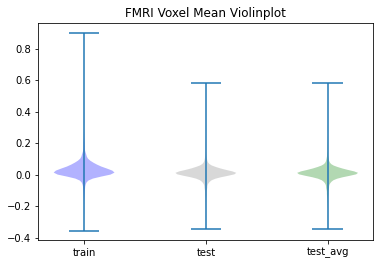

In [3]:
import matplotlib.pyplot as plt

plt.figure(1)
vp = plt.violinplot(
    [np.mean(train_fmri, axis=0), np.mean(test_fmri, axis=0), np.mean(test_fmri_avg, axis=0)]
)
colors = ['blue', 'grey', 'green']
for i in range(3):
    vp['bodies'][i].set(facecolor=colors[i])
plt.xticks([1, 2, 3], ['train', 'test', 'test_avg'])
plt.title('FMRI Voxel Mean Violinplot')
plt.show()

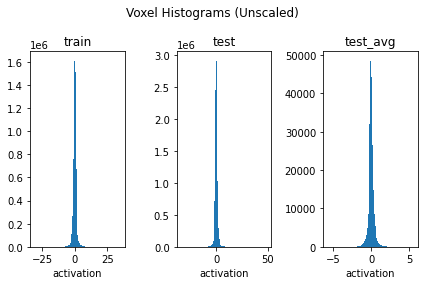

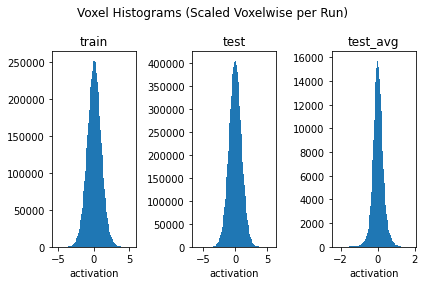

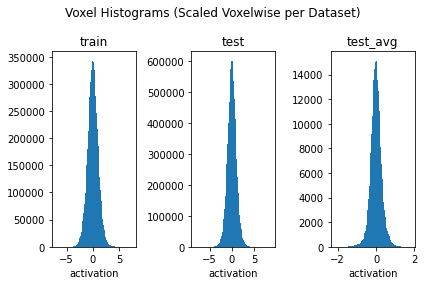

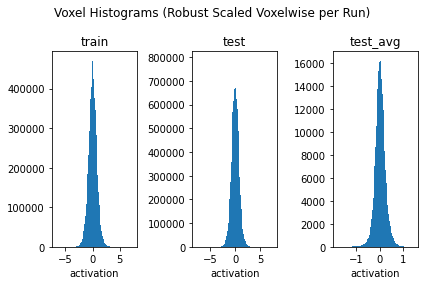

In [4]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler, StandardScaler

# Unscaled
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Voxel Histograms (Unscaled)')
ax1.hist(train_fmri.flatten(), bins=100)
ax1.set_title('train')
ax1.set_xlabel('activation')
ax2.hist(test_fmri.flatten(), bins=100)
ax2.set_title('test')
ax2.set_xlabel('activation')
ax3.hist(test_fmri_avg.flatten(), bins=100)
ax3.set_title('test_avg')
ax3.set_xlabel('activation')
fig.tight_layout()
plt.show()

#scaled per run
train_fmri_run_scaled, test_fmri_run_scaled, test_fmri_avg_run_scaled = handler.get_data(roi='ROI_VC', normalize=1, imag_data=0, test_run_list=None)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Voxel Histograms (Scaled Voxelwise per Run)')
ax1.hist(train_fmri_run_scaled.flatten(), bins=100)
ax1.set_title('train')
ax1.set_xlabel('activation')
ax2.hist(test_fmri_run_scaled.flatten(), bins=100)
ax2.set_title('test')
ax2.set_xlabel('activation')
ax3.hist(test_fmri_avg_run_scaled.flatten(), bins=100)
ax3.set_title('test_avg')
ax3.set_xlabel('activation')
fig.tight_layout()
plt.show()

# scaled seperately
train_fmri_scaled2, test_fmri_scaled2, test_fmri_avg_scaled2 = handler.get_data(roi='ROI_VC', normalize=2, imag_data=0, test_run_list=None)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Voxel Histograms (Scaled Voxelwise per Dataset)')
ax1.hist(train_fmri_scaled2.flatten(), bins=100)
ax1.set_title('train')
ax1.set_xlabel('activation')
ax2.hist(test_fmri_scaled2.flatten(), bins=100)
ax2.set_title('test')
ax2.set_xlabel('activation')
ax3.hist(test_fmri_avg_scaled2.flatten(), bins=100)
ax3.set_title('test_avg')
ax3.set_xlabel('activation')
fig.tight_layout()
plt.show()

# robust scaled per run
train_fmri_rscaled, test_fmri_rscaled, test_fmri_avg_rscaled = handler.get_data(roi='ROI_VC', normalize=1, imag_data=0, scale='robust', test_run_list=None)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Voxel Histograms (Robust Scaled Voxelwise per Run)')
ax1.hist(train_fmri_rscaled.flatten(), bins=100)
ax1.set_title('train')
ax1.set_xlabel('activation')
ax2.hist(test_fmri_rscaled.flatten(), bins=100)
ax2.set_title('test')
ax2.set_xlabel('activation')
ax3.hist(test_fmri_avg_rscaled.flatten(), bins=100)
ax3.set_title('test_avg')
ax3.set_xlabel('activation')
fig.tight_layout()
plt.show()


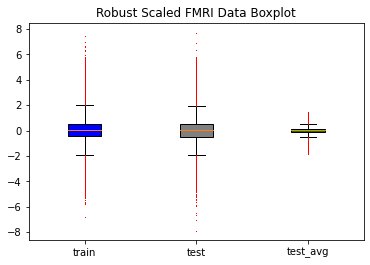

In [5]:
import matplotlib.pyplot as plt

plt.figure(1)
bp = plt.boxplot(
    [train_fmri_rscaled.flatten(), test_fmri_rscaled.flatten(), test_fmri_avg_rscaled.flatten()],
    patch_artist=True, 
    notch=False, 
    showfliers=True,
    flierprops=dict(markersize=0.5, marker='+', markerfacecolor='r', markeredgecolor='r')
)
colors = ['blue', 'grey', 'green']
for i in range(3):
    bp['boxes'][i].set(facecolor=colors[i])
plt.xticks([1, 2, 3], ['train', 'test', 'test_avg'])
plt.title('Robust Scaled FMRI Data Boxplot')
plt.show()

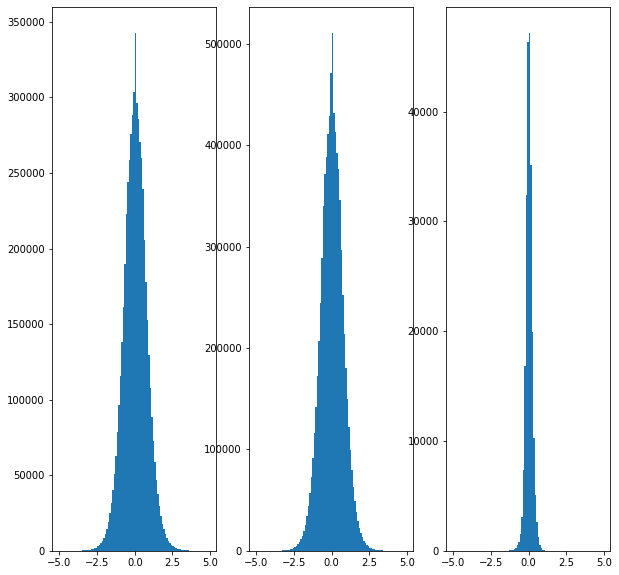

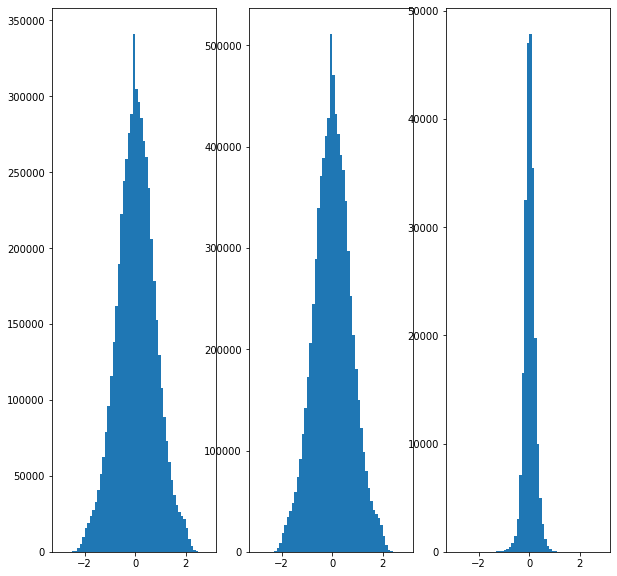

In [6]:
# Outlier Thresholding
import matplotlib.pyplot as plt

# train_fmri_thresh, test_fmri_thresh, test_fmri_avg_thresh = handler.get_data(roi='ROI_VC', normalize=1, imag_data=0, scale='robust', test_run_list=None, remove_outliers=0)
# # q3, q1 = np.percentile(train_fmri_thresh, [75, 25], axis=0)
# # iqr = q3 - q1
# # tl = q1 - 1.5*iqr
# # th  = q3 + 1.5*iqr
# # for i in range(NUM_VOXELS):
# #     train_fmri_thresh[train_fmri_thresh[:, i] <= tl[i], i] = tl[i]
# #     train_fmri_thresh[train_fmri_thresh[:, i] >= th[i], i] = th[i]


# fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 10))
# ax1.hist(train_fmri_thresh.flatten(), bins=100)
# ax2.hist(test_fmri_thresh.flatten(), bins=100)
# ax3.hist(test_fmri_avg_thresh.flatten(), bins=100)
# plt.show()

bins = np.arange(-5, 5, 0.1)

train_fmri_thresh, test_fmri_thresh, test_fmri_avg_thresh = handler.get_data(roi='ROI_VC', normalize=1, imag_data=0, scale='robust', test_run_list=None, remove_outliers=0)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 10))
ax1.hist(train_fmri_thresh.flatten(), bins=bins)
ax2.hist(test_fmri_thresh.flatten(), bins=bins)
ax3.hist(test_fmri_avg_thresh.flatten(), bins=bins)
plt.show()

bins = np.arange(-3, 3, 0.1)
train_fmri_thresh2, test_fmri_thresh2, test_fmri_avg_thresh2 = handler.get_data(roi='ROI_VC', normalize=1, imag_data=0, scale='robust', test_run_list=None, remove_outliers=2)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 10))
ax1.hist(train_fmri_thresh2.flatten(), bins=bins)
ax2.hist(test_fmri_thresh2.flatten(), bins=bins)
ax3.hist(test_fmri_avg_thresh2.flatten(), bins=bins)
plt.show()


In [7]:
plt.hist(threshes[0][0])
plt.figure()
plt.hist(threshes[0][1])
plt.show()

NameError: name 'threshes' is not defined